In [3]:
# importing all the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# Modelling
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor



import warnings
warnings.filterwarnings('ignore')

## Loading the dataset and preview of the data

In [4]:
# loading the dataset into a dataframe
df = pd.read_csv('data/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Preparing X and y variables

In [5]:
# selecting the X features
X = df.drop(columns=['math score'], axis=1)

In [6]:
# selecting our labels
y = df['math score']

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [8]:
y.head()

0    67
1    40
2    59
3    77
4    78
Name: math score, dtype: int64

In [9]:
# Create Column Tranformers with 3 types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
# preprocessing x features
X = preprocessor.fit_transform(X)

In [11]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an evaluation function to give all metrics after model training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Ada Boost": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rsme, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rsme, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rsme))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-"*35)

    print("Model Performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rsme))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5409
- Mean Absolute Error: 4.4334
- R2 Score: 0.8708
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.5364
- Mean Absolute Error: 4.5845
- R2 Score: 0.8690


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.8168
- Mean Absolute Error: 5.4228
- R2 Score: 0.8044
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.8049
- Mean Absolute Error: 5.3352
- R2 Score: 0.8022


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5331
- Mean Absolute Error: 4.4431
- R2 Score: 0.8711
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.5058
- Mean Absolute Error: 4.5654
- R2 Score: 0.8705




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8211
- Mean Absolute Error: 4.6493
- R2 Score: 0.8574
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.6365
- Mean Absolute Error: 5.4030
- R2 Score: 0.8118


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0250
- Mean Absolute Error: 0.0013
- R2 Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 8.5009
- Mean Absolute Error: 6.7150
- R2 Score: 0.6913


Random Forest
Model performance for Training set
- Root Mean Squared Error: 2.4195
- Mean Absolute Error: 1.8946
- R2 Score: 0.9754
-----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.0253
- Mean Absolute Error: 4.9274
- R2 Score: 0.8449


XGB Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9665
- Mean Absolute Error: 0.6541
- R2 Score: 0.9961
--------

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
2,Ridge,0.870487
0,Linear Regression,0.869042
5,Random Forest,0.844894
6,XGB Regressor,0.833131
7,Ada Boost,0.815067
3,K-Neighbors Regressor,0.811827
1,Lasso,0.802157
4,Decision Tree,0.691251


## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.90


## Plot y_pred and y_test

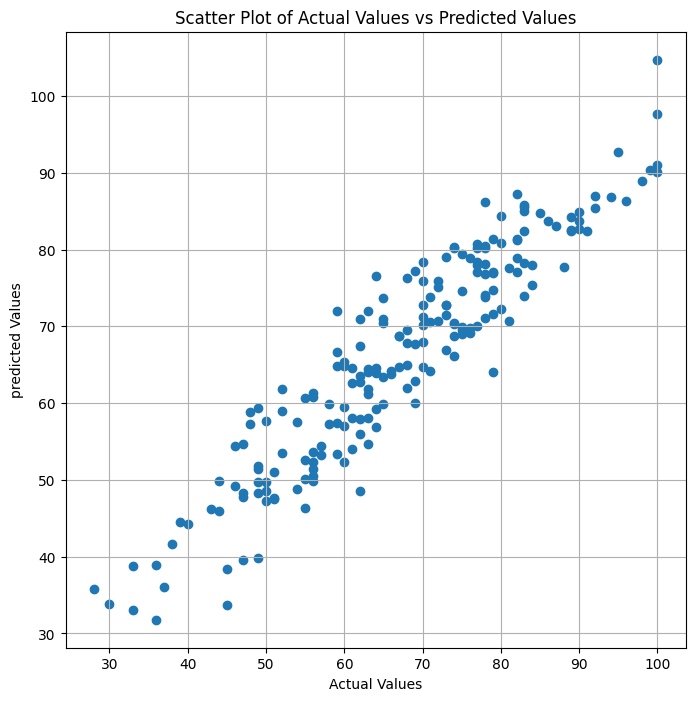

In [19]:
plt.figure(figsize=(8,8))

plt.scatter(y_test,y_pred)
plt.title("Scatter Plot of Actual Values vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")
plt.grid()
plt.show()

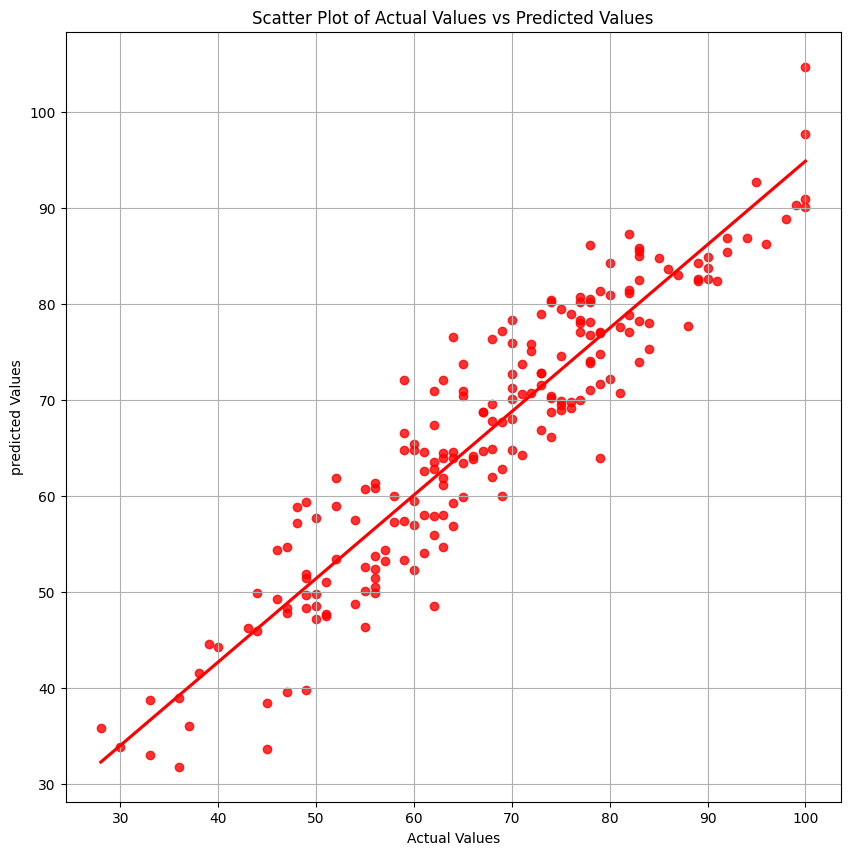

In [21]:
plt.figure(figsize=(10,10))

sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.title("Scatter Plot of Actual Values vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")
plt.grid()
plt.show()

## Difference Between Actual and Predicted Values

In [22]:
pred_df = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred, 'Difference':y_test-y_pred})
pred_df.head()

,Actual Values,Predicted Values,Difference
521,65,70.40625,-5.40625
737,83,85.50000,-2.50000
740,52,58.96875,-6.96875
660,90,82.62500,7.37500
411,62,62.78125,-0.78125
